<a href="https://colab.research.google.com/github/CarlysbergBarreto/main/blob/main/MVP_An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas_Carlysberg_Barreto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Dados: Previsão de Incêndios Florestais**

## 1. Introdução



Os incêndios florestais são eventos devastadores que têm crescido em frequência e intensidade devido às mudanças climáticas. Em 2023, o Canadá registrou sua pior temporada de incêndios florestais da história, com mais de 18,5 milhões de hectares queimados, superando o recorde anterior de 7,6 milhões de hectares em 1989. Esses incêndios não apenas destroem ecossistemas e ameaçam a vida selvagem, mas também afetam a qualidade do ar, a saúde das populações locais e contribuem significativamente para o aumento das emissões globais de carbono.

Na América do Sul, a região amazônica também sofreu com incêndios florestais devastadores, exacerbados pela seca extrema e atividades humanas ilegais, como o desmatamento para a expansão agrícola. Entre os países mais afetados estão Brasil, Peru e Bolívia, onde milhões de hectares de florestas foram consumidos pelo fogo, prejudicando a biodiversidade e o sustento de comunidades locais.

Esses incêndios são um reflexo das mudanças climáticas, que intensificam eventos extremos, como ondas de calor e secas, criando condições ideais para a propagação rápida do fogo. A análise do Forest Fires Dataset nos ajuda a entender melhor os fatores que influenciam a ocorrência desses incêndios, possibilitando a previsão da área queimada com base em variáveis climáticas, o que pode ser um passo importante na prevenção e mitigação de desastres ambientais.

## 2. Importação de Bibliotecas e Configurações

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import missingno as ms

# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")


In [13]:
url = 'https://raw.githubusercontent.com/CarlysbergBarreto/main/refs/heads/main/forestfires.csv'
df = pd.read_csv(url)


## 3. Atributos do Dataset

O dataset contém as seguintes variáveis que serão utilizadas para prever a área queimada:
* X, Y: Coordenadas espaciais do incêndio.
* month, day: Mês e dia da semana em que o incêndio ocorreu.
* FFMC, DMC, DC, ISI: Índices que medem a umidade e propagação do fogo.
* temp: Temperatura (°C).
* RH: Umidade relativa (%).
* wind: Velocidade do vento (km/h).
* rain: Precipitação (mm).
* area: Área queimada (hectares).




## 4. Análise Exploratória de Dados (EDA)

### Estatísticas Descritivas

Nesta seção, realizamos a verificação das primeiras e últimas linhas do dataset, o tipo de dados de cada coluna e a distribuição das classes.

In [15]:
# Mostra as 10 primeiras linhas do dataset
print(df.head(10))

   X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  area  \
0  7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.0   
1  7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.0   
2  7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.0   
3  8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.0   
4  8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.0   
5  8  6   aug  sun  92.3   85.3  488.0  14.7  22.2  29   5.4   0.0   0.0   
6  8  6   aug  mon  92.3   88.9  495.6   8.5  24.1  27   3.1   0.0   0.0   
7  8  6   aug  mon  91.5  145.4  608.2  10.7   8.0  86   2.2   0.0   0.0   
8  8  6   sep  tue  91.0  129.5  692.6   7.0  13.1  63   5.4   0.0   0.0   
9  7  5   sep  sat  92.5   88.0  698.6   7.1  22.8  40   4.0   0.0   0.0   

     class  
0  Nenhuma  
1  Nenhuma  
2  Nenhuma  
3  Nenhuma  
4  Nenhuma  
5  Nenhuma  
6  Nenhuma  
7  Nenhuma  
8  Nenhuma  
9  Nenhuma  


In [16]:
# Mostra as 10 últimas linhas do dataset
print(df.tail(10))

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
507  2  4   aug  fri  91.0  166.9  752.6   7.1  25.9  41   3.6   0.0   0.00   
508  1  2   aug  fri  91.0  166.9  752.6   7.1  25.9  41   3.6   0.0   0.00   
509  5  4   aug  fri  91.0  166.9  752.6   7.1  21.1  71   7.6   1.4   2.17   
510  6  5   aug  fri  91.0  166.9  752.6   7.1  18.2  62   5.4   0.0   0.43   
511  8  6   aug  sun  81.6   56.7  665.6   1.9  27.8  35   2.7   0.0   0.00   
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44   
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29   
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16   
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00   
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00   

       class  
507  Nenhuma  
508  Nenhuma  
509    Baixa  
510    Baixa  
511  Nenhuma  
512    Baixa  
513    Média  
514    Bai

In [17]:
# Verifica o tipo de dados de cada atributo
print(df.dtypes)

X           int64
Y           int64
month      object
day        object
FFMC      float64
DMC       float64
DC        float64
ISI       float64
temp      float64
RH          int64
wind      float64
rain      float64
area      float64
class    category
dtype: object


In [21]:
# Criando as classes baseadas nos dados do dataset
df['class'] = pd.cut(df['area'],
                     bins=[-1, 0, 6.57, 25, float('inf')],
                                          labels=['Nenhuma', 'Baixa', 'Média', 'Alta'])


In [22]:
# Verifica a distribuição das classes
print(df.groupby('class').size())

class
Nenhuma    247
Baixa      141
Média       77
Alta        52
dtype: int64


Temos então a seguinte distribuição das Classes:

Nenhuma: 247 registros
Baixa: 141 registros
Média: 77 registros
Alta: 52 registros

In [23]:
df.describe()


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


### Verificação de Valores Faltantes

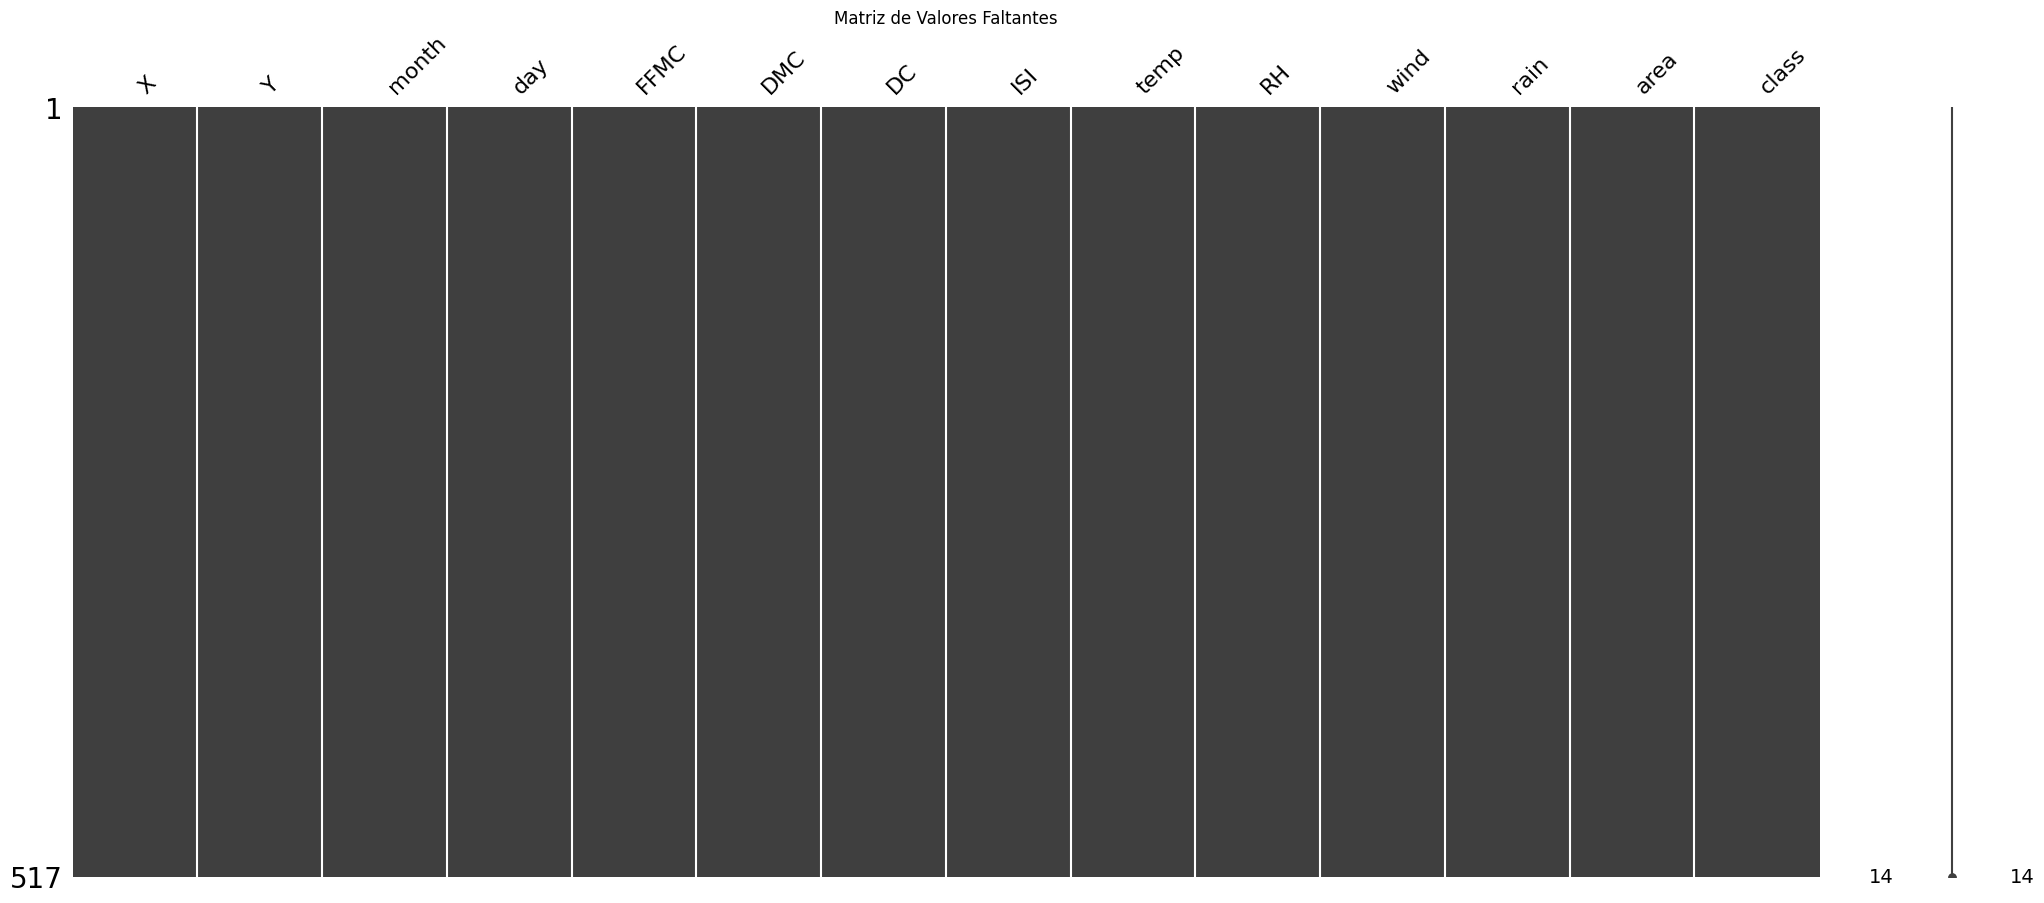

In [24]:
ms.matrix(df)
plt.title('Matriz de Valores Faltantes')
plt.show()


### Distribuição de Incêndios por Mês

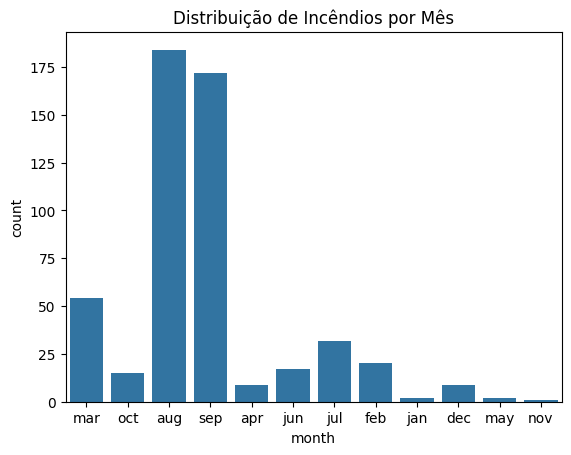

In [25]:
sns.countplot(x='month', data=df)
plt.title('Distribuição de Incêndios por Mês')
plt.show()

### Distribuição da Área Queimada

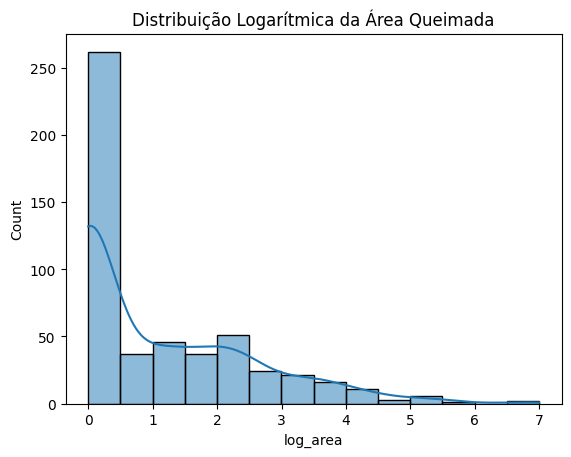

In [26]:
df['log_area'] = np.log(df['area'] + 1)
sns.histplot(df['log_area'], kde=True)
plt.title('Distribuição Logarítmica da Área Queimada')
plt.show()


### Scatter Plot com Seaborn

Visualizamos um pairplot para analisar as interações entre as variáveis numéricas:

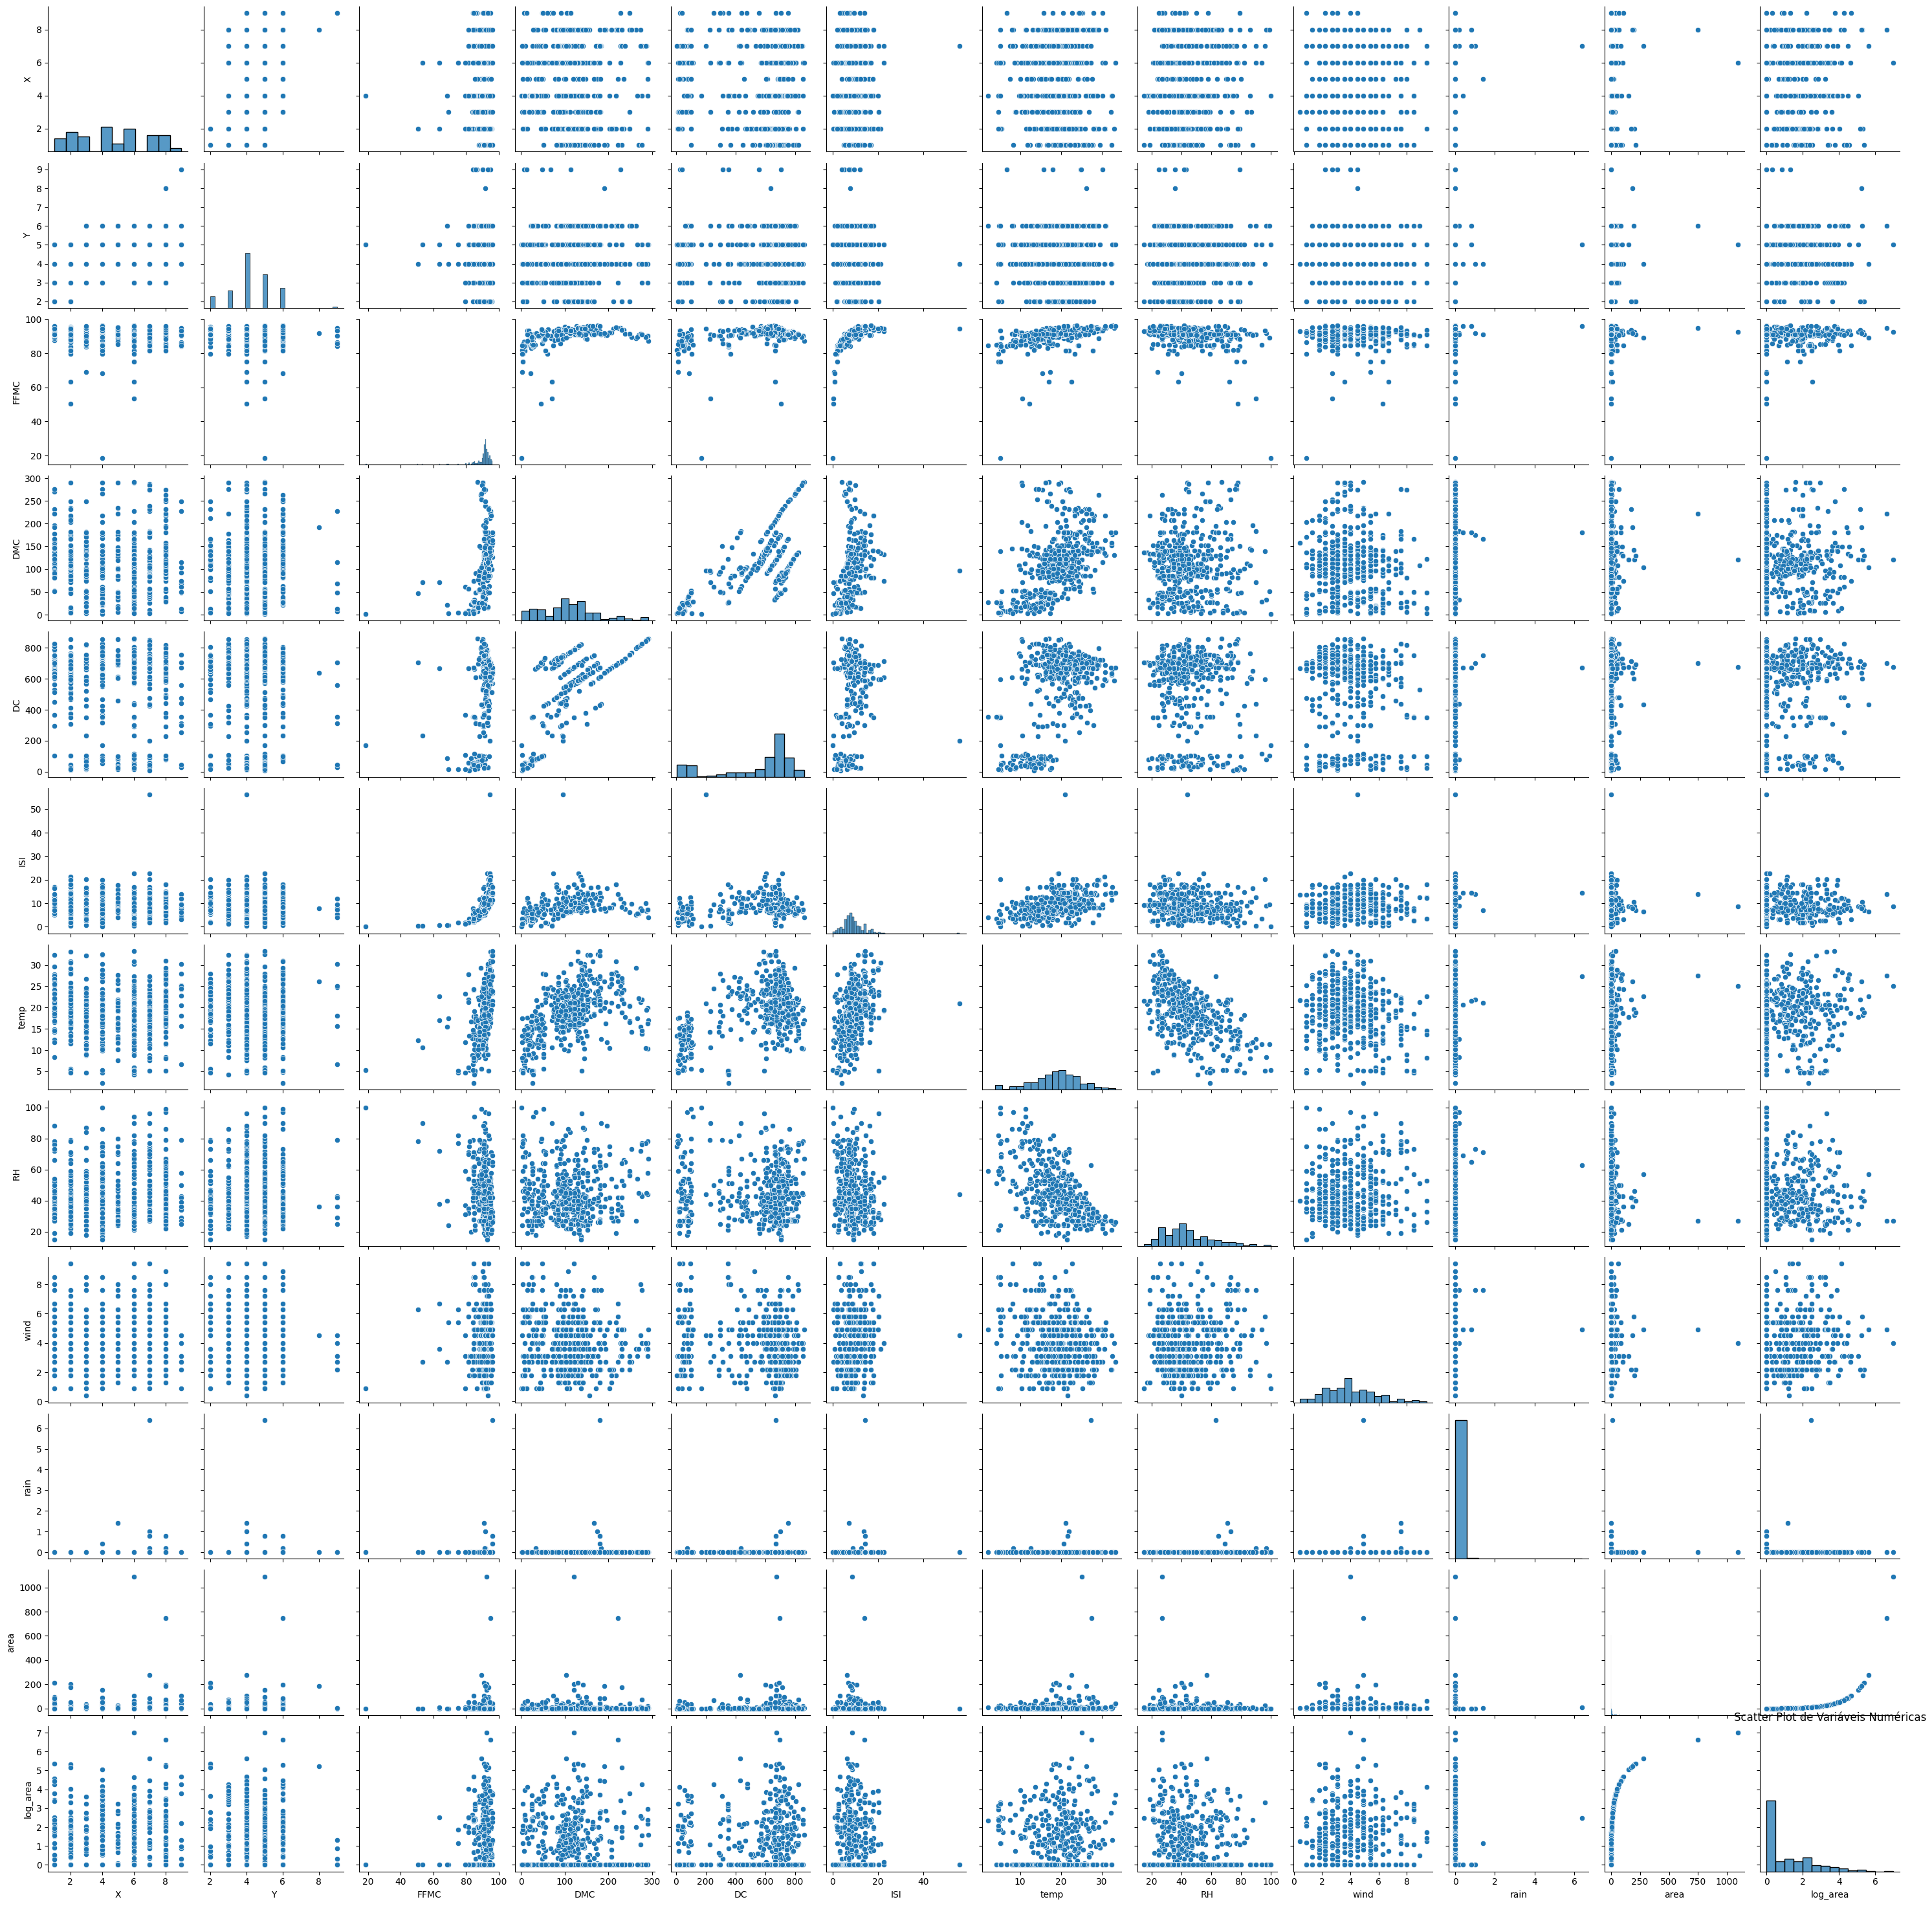

In [27]:
sns.pairplot(df)
plt.title('Scatter Plot de Variáveis Numéricas')
plt.show()


### Correlação entre Variáveis

Removi as variáveis categóricas e focarei apenas nas variáveis numéricas para calcular a correlação:

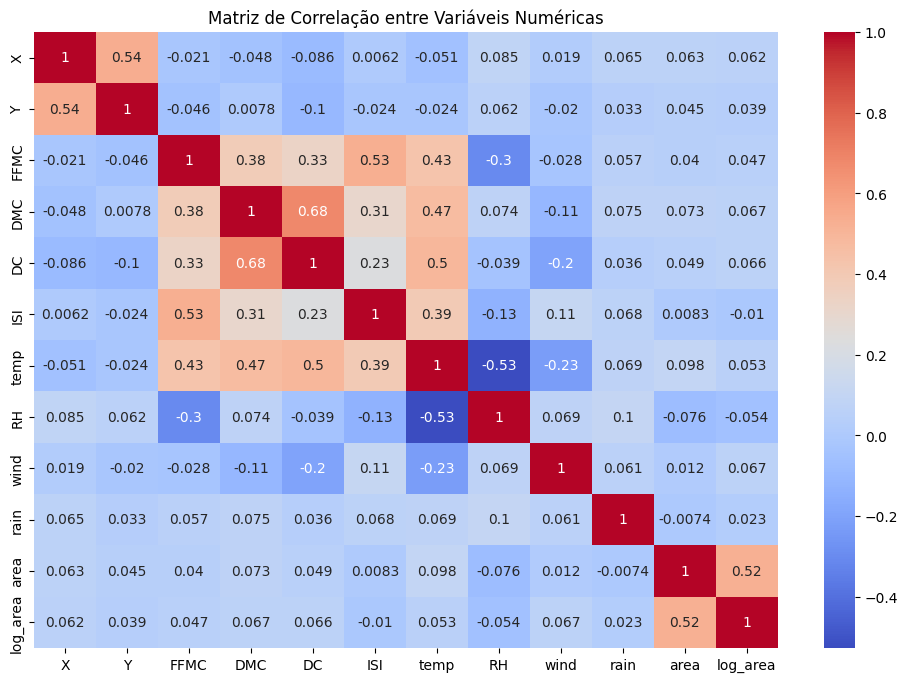

In [29]:
# Seleciona apenas as colunas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Criar a matriz de correlação apenas com variáveis numéricas
plt.figure(figsize=(12,8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()



## 5. Pré-processamento de Dados

### Codificação de Variáveis Categóricas

In [30]:
df = pd.get_dummies(df, columns=['month', 'day'], drop_first=True)


### Normalização das Variáveis

In [31]:
scaler = StandardScaler()
df[['temp', 'RH', 'wind', 'rain']] = scaler.fit_transform(df[['temp', 'RH', 'wind', 'rain']])


## 6. Gráfico Utilizando a Paleta de Cores "Viridis"

O gráfico a seguir mostra a distribuição da variável temp (Temperatura) com base na umidade relativa (RH), utilizando a paleta de cores "Viridis". (Conforme ensinado pela Profa. Dra. Simone Diniz Junqueira Barbosa)

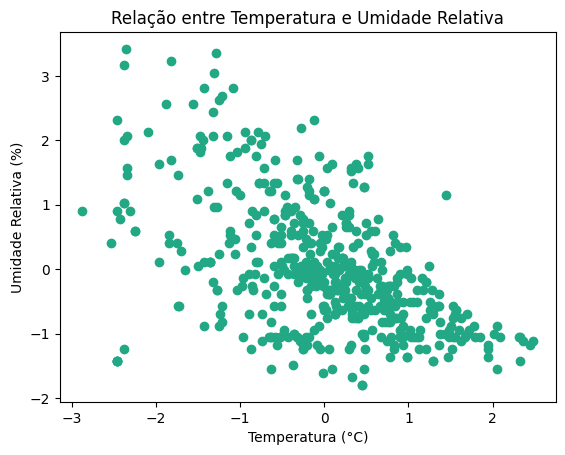

In [32]:
import matplotlib.pyplot as plt

coresViridis = ['#440154', '#482677', '#2a788e', '#22a884', '#7ad151']

plt.scatter(df['temp'], df['RH'], color=coresViridis[3])
plt.title('Relação entre Temperatura e Umidade Relativa')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Umidade Relativa (%)')
plt.show()


## 7. Separação em conjunto de treino e conjunto de teste

Divi o dataset em conjunto de treino e conjunto de teste. O conjunto de treino será utilizado para ajustar o modelo, enquanto o conjunto de teste permite avaliar o modelo.

In [33]:
X = df.drop(['area', 'log_area', 'class'], axis=1)
y = df['log_area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 8. Conclusão

1. Quantos atributos e instâncias existem?

O Forest Fires Dataset contém 13 atributos e 517 instâncias. Esses atributos incluem tanto variáveis numéricas (como coordenadas espaciais e dados climáticos) quanto variáveis categóricas (como o mês e o dia do incêndio). A variável alvo, area, representa a área queimada em hectares.
2. Quais são os tipos de dados dos atributos?

Os atributos do dataset consistem em variáveis numéricas e categóricas. Variáveis numéricas incluem X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain e area. As variáveis categóricas são month e day. Após a aplicação do One-Hot Encoding para codificar as variáveis categóricas, todas as colunas podem ser tratadas como numéricas.
3. Verifique as primeiras linhas do dataset. Algo chama a atenção?

As primeiras linhas do dataset mostram que muitos registros têm valores muito baixos ou zero para a variável area, o que significa que a maioria dos incêndios resultou em pouca ou nenhuma área queimada. Isso é um ponto importante a ser considerado, pois a alta concentração de valores nulos pode afetar a modelagem.
4. Há valores faltantes, discrepantes ou inconsistentes?

Após a verificação de valores faltantes, não foram identificados valores ausentes no dataset. Além disso, os valores climáticos e espaciais parecem estar dentro de intervalos razoáveis e não há discrepâncias aparentes. A variável area, no entanto, é altamente assimétrica, com muitos valores baixos e alguns valores muito altos.
5. Resumo estatístico dos atributos com valor numérico

O resumo estatístico da variável area mostrou uma distribuição assimétrica. A mediana de 0.52 hectares, juntamente com a média de 12.84 hectares, indica que mais da metade dos incêndios queimaram uma área muito pequena, enquanto alguns poucos incêndios queimaram áreas extremamente grandes (até 1090.84 hectares). O desvio-padrão de 63.65 reflete essa grande variação na área queimada. Isso sugere que, para uma modelagem mais eficaz, a variável area pode se beneficiar de uma transformação logarítmica para lidar com essa assimetria.

## Visualizações

1. Distribuição de cada atributo

A distribuição dos atributos numéricos, visualizada por histogramas, revela o seguinte:

A variável temp (temperatura) tem uma distribuição normal, como esperado.
A variável area é altamente assimétrica, com muitos valores próximos de zero e alguns incêndios que causaram grandes áreas queimadas. Isso pode sugerir a necessidade de uma transformação, como a transformação logarítmica, para facilitar a análise.

2. Distribuição de frequência das classes

Quando a variável area foi dividida em categorias (Nenhuma, Baixa, Média, Alta), observou-se um forte desbalanceamento de classes. A maioria dos registros pertence à classe "Nenhuma" (247 instâncias), indicando que muitos incêndios resultaram em pouca ou nenhuma área queimada. Isso sugere que, se a variável area for usada em uma tarefa de classificação, um balanceamento de classes pode ser necessário para evitar viés no modelo.

3. Análise combinada de atributos

A matriz de correlação revelou que:

A variável temp (temperatura) tem uma correlação positiva moderada com a variável area, indicando que temperaturas mais altas podem estar associadas a incêndios mais severos em termos de área queimada.
As variáveis RH (umidade relativa) e rain (precipitação) têm correlações negativas com a área queimada, o que é esperado, pois maior umidade e chuvas tendem a conter a propagação dos incêndios.
Outros atributos climáticos, como wind (vento), não mostraram uma correlação forte, mas ainda podem ser fatores importantes dependendo do contexto do incêndio.

## Conclusão Final

Em resumo, o Forest Fires Dataset apresenta muitos incêndios de pequeno impacto, com poucos incêndios causando grandes áreas queimadas. Isso se reflete em uma distribuição altamente assimétrica da variável area, que pode necessitar de transformações durante a modelagem. As variáveis climáticas, como temperatura e umidade, desempenham papéis importantes na propagação dos incêndios, conforme indicado pelas correlações moderadas. O desbalanceamento das classes indica que, para problemas de classificação, será necessário tratar o viés, por exemplo, com técnicas de balanceamento de dados.